# Regression with Neural Networks in Tensorflow

predicting a variable using the other combination of variables.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


**creating data to view and fit**

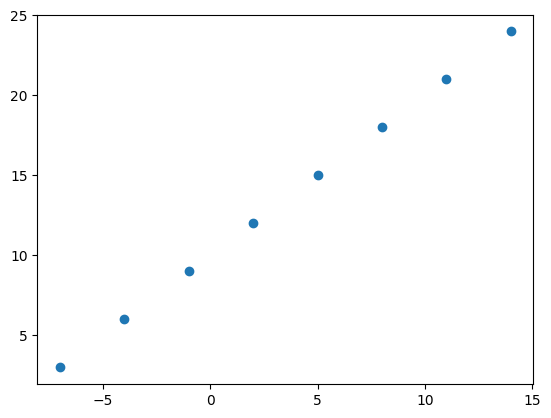

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Create labels
Y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#visualize it
plt.scatter(X,Y)

In [3]:
Y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shapes

In [4]:
#creating a demo tensor for housing price prediction problem
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = Y.shape
input_shape,output_shape

((8,), (8,))

In [6]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape,output_shape
#No shape as it is a scalar value

((), ())

In [7]:
#Turn NumPy arrays into tensors
X = tf.constant(X)
Y = tf.constant(Y)
X,Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [8]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

# Steps in modelling with Tensorflow



1.   Creating a model - define input and output layers, as well as the hidden layers of a deep learning model.
2.   Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is ) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we canuse to interpret the performance of our model).
3.Fitting a model - letting the try to find patterns between X & Y



In [9]:
#ways of writing sequential api
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8,input_shape=(1,)))


In [10]:
#set random seed

tf.random.set_seed(42)

#1.create a model using the sequential API

model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

#2.compile the model

model.compile(loss =tf.keras.losses.mae, #mean absolute error
              optimizer = tf.keras.optimizers.SGD(), #Stochastic Gradient Descent (SGD)
              metrics = ["mae"])

#3.fit the model
model.fit(tf.expand_dims(X,axis=-1),Y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 290ms/step - loss: 16.5099 - mae: 16.5099
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 16.2286 - mae: 16.2286
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 15.9474 - mae: 15.9474
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 15.6661 - mae: 15.6661
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 15.3849 - mae: 15.3849


In [11]:
tf.expand_dims(X,axis=-1),Y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
#4.try and make a prediction using our model
y_pred = model.predict(np.array([[17.0]]))

1/1 [==============================] - 0s 64ms/step


In [13]:
y_pred
#we can observe the results are far off due to the loss function

array([[-7.6748137]], dtype=float32)

# Improving our model

we can improve our model, by altering the steps we took to create a model.

1. **create a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change optimization function or perhaps the learning ratebold text
3. **Fitting a model** - here we might fit a model for more  **epochs** (leave it training for longer) or on more data (give model more examples to learn from).


In [14]:
#rebuilding the model
# 1. create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ])
# 2. compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#3. fit the model (this time we'll train for longer)

model.fit(tf.expand_dims(X,axis=-1),Y,epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 242ms/step - loss: 10.4766 - mae: 10.4766
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 10.3440 - mae: 10.3440
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.2115 - mae: 10.2115
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0791 - mae: 10.0791
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 9.9466 - mae: 9.9466
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.8140 - mae: 9.8140
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 9.6815 - mae: 9.6815
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 9.5491 - mae: 9.5491
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 9.4165 - mae: 9.4165
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 9.2840 - mae: 9.2840
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - los

In [15]:
#let's see our models prediction
y_pred = model.predict(np.array([[17.0]]))
y_pred

1/1 [==============================] - 0s 40ms/step


array([[29.775318]], dtype=float32)

In [16]:
#adding the adam optimizer

#1. create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

#compile the model using adam optimizer
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#3. fit the model (this time we'll train for longer)

model.fit(tf.expand_dims(X,axis=-1),Y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 335ms/step - loss: 12.4203 - mae: 12.4203
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.8654 - mae: 11.8654
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.2985 - mae: 11.2985
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.7340 - mae: 10.7340
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1470 - mae: 10.1470
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.5431 - mae: 9.5431
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 8.9102 - mae: 8.9102
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 8.2387 - mae: 8.2387
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 7.5192 - mae: 7.5192
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 6.7480 - mae: 6.7480
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - l

In [17]:
#prediction

y_pred = model.predict(np.array([[17.0]]))
y_pred
#the mode given even bad prediction then previous due to overfitting

1/1 [==============================] - 0s 46ms/step


array([[32.881683]], dtype=float32)

In [18]:
X,Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [19]:
#adding the adam optimizer

#1. create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation=None),
    tf.keras.layers.Dense(1)
])

#compile the model using adam optimizer
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"])

#3. fit the model (this time we'll train for longer)

model.fit(tf.expand_dims(X,axis=-1),Y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 415ms/step - loss: 13.6731 - mae: 13.6731
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 12.6722 - mae: 12.6722
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.6592 - mae: 11.6592
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6299 - mae: 10.6299
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 9.5800 - mae: 9.5800
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 8.5045 - mae: 8.5045
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 7.3981 - mae: 7.3981
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 6.7443 - mae: 6.7443
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 7.2609 - mae: 7.2609
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 7.8956 - mae: 7.8956
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - los

In [20]:
X,Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [21]:
y_pred = model.predict(np.array([[17.0]]))
y_pred


1/1 [==============================] - 0s 45ms/step


array([[28.906809]], dtype=float32)

# Evaluating a model
Build a model -> fit it -> evaluate it-> tweak a model-> fit it -> evaluate it ....\


**we need to visualize the data, training of a model, prediction of the model  and model itself.**

In [22]:
#Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [23]:
#Make labels for the dataset
y = X +10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

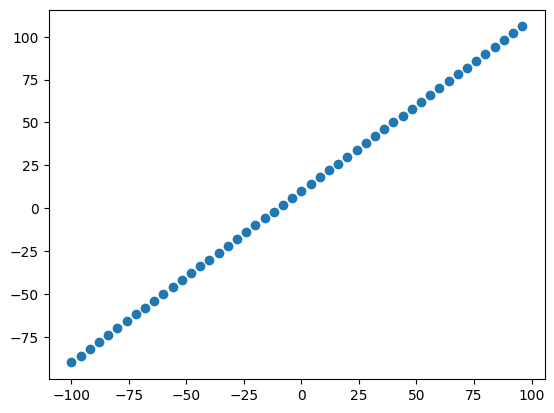

In [24]:
#visualize the data
plt.scatter(X,y)

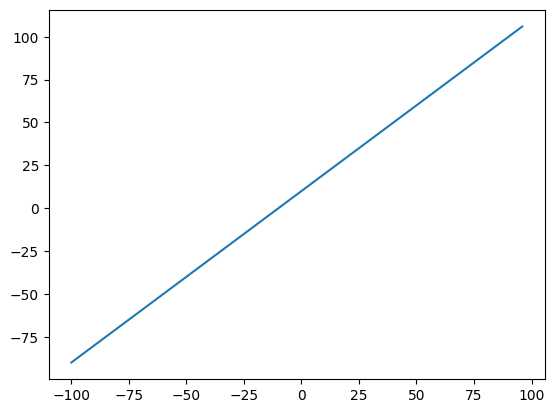

In [25]:
plt.plot(X,y)

### The 3 sets ...

1. **Training Set**- the model learns from this data, which is typically 70-80%
 of the total data you have available.
2. **Validation Set** - the model gets tuned on this data, which is typically 10-15%
of the data available.
3. **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of total data.

In [26]:
#check the length of how many samples we have
len(X)


50

In [27]:
#Split the data into train and test sets
X_train = X[:40]# 80% data
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train),len(X_test)



(40, 10)

# Visualizing the data

visualize it as after making into train and test sets.

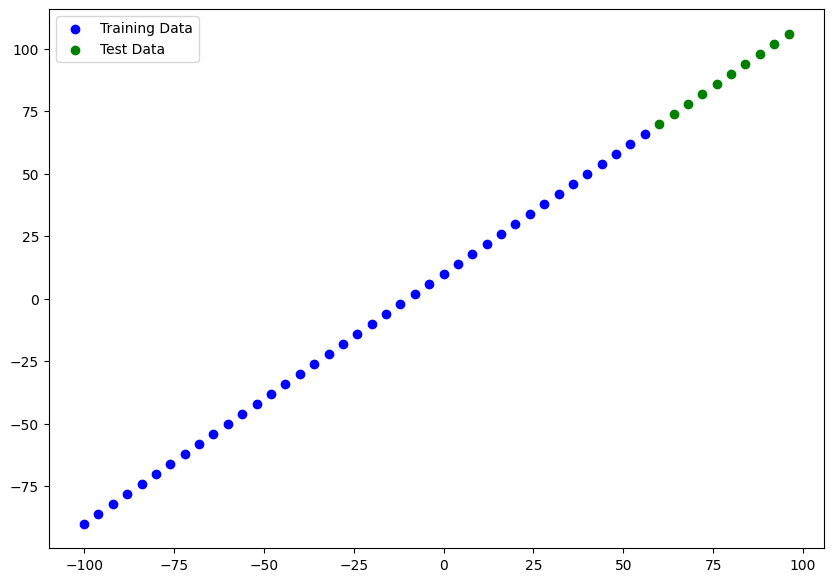

In [28]:
plt.figure(figsize=(10,7))
#plot training data in blue
plt.scatter(X_train,y_train,c="b", label ="Training Data")
#plot test data in green
plt.scatter(X_test,y_test,c="g",label = "Test Data")
#show a legend
plt.legend()

In [29]:
#Let's build the neural network for our data

#1. create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#2. compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])
#3. fit the model
#model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)


In [30]:
tf.expand_dims(X_train,axis=-1).ndim

2

In [31]:
#model.summary()

In [32]:
#creating a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)
#1. create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20,input_shape=[1,],name = "input_layer"), #this gives output shape of (M,3)
    tf.keras.layers.Dense(1,name ="output_layer") # the output shape needs to be of shape (M,1) where M is the input to the hidden layers.
],name = "model_2")
#2. compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])


In [33]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 20)                40        
                                                                 
 output_layer (Dense)        (None, 1)                 21        
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Total params** - total number of parameters in the model.

**Trainable parameters** - these are the parameters(patterns) the model can update as it trains.

**Non-Trainable parameters** - these parameter aren't updated during training(this is typical when you bring in already learn patterns or parameters from other models during**Transfer learning**).

In [34]:
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose = 0)

In [35]:
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose = 1)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 15.7570 - mae: 15.7570
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 8.1686 - mae: 8.1686
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 17.9268 - mae: 17.9268
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 10.0187 - mae: 10.0187
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 12.4016 - mae: 12.4016
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.8887 - mae: 9.8887
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 10.9374 - mae: 10.9374
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 13.9240 - mae: 13.9240
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 25.1893 - mae: 25.1893
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 15.8587 - mae: 15.8587
Epoch 11/100
2/2 [==============================] - 0s 4ms/step

In [36]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# Visualizing the model's predictions

visualize against ground truth labels

from **y_test** or **y_true** versus **y_pred** (ground truth versus the model's predictions.)

In [37]:
#make some predictions

y_pred = model.predict(tf.expand_dims(X_test,axis =-1))
y_pred

1/1 [==============================] - 0s 46ms/step


array([[ 79.53278 ],
       [ 84.62266 ],
       [ 89.71253 ],
       [ 94.80241 ],
       [ 99.89228 ],
       [104.98214 ],
       [110.07202 ],
       [115.161896],
       [120.25177 ],
       [125.34163 ]], dtype=float32)

In [38]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [39]:
#create plotting function

def plot_predictions(train_data= X_train,
                     train_labels=y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """

  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data,train_labels,c="b",label = "Training data" )
  #plot test data in green
  plt.scatter(test_data,test_labels,c="g",label = "Test data")
  #plot the model predictions
  plt.scatter(test_data,predictions,c="r",label = "Predictions")
  #plot legend
  plt.legend()

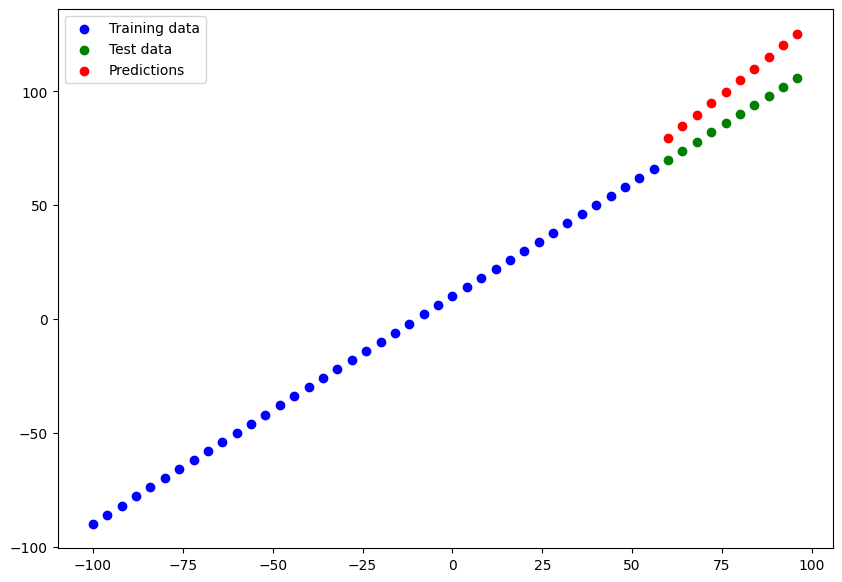

In [40]:
plot_predictions()
#plot_predictions(train_data= X_train,train_labels=y_train,test_data = X_test,test_labels = y_test,predictions=y_pred)

# Evaluating our model's predictions with regression evaluation metrics

Depending on the problem there will be different evaluation metrics to evaluate the model's performance.

for regression

MAE - MEAN ABSOLUTE ERROR

MSE - MEAN SQUARED ERROR

In [41]:
model.evaluate(X_test,y_test)

#it gives loss and evaluation metrics

1/1 [==============================] - 0s 117ms/step - loss: 14.4372 - mae: 14.4372


[14.437210083007812, 14.437210083007812]

In [42]:
#calculate the mean absolute error
mae=tf.keras.metrics.MeanAbsoluteError()
mae.update_state(y_test,y_pred)
result = mae.result().numpy()
result

14.437212

In [43]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 79.53278 ,  84.62266 ,  89.71253 ,  94.80241 ,  99.89228 ,
       104.98214 , 110.07202 , 115.161896, 120.25177 , 125.34163 ],
      dtype=float32)>

In [44]:
y_pred

array([[ 79.53278 ],
       [ 84.62266 ],
       [ 89.71253 ],
       [ 94.80241 ],
       [ 99.89228 ],
       [104.98214 ],
       [110.07202 ],
       [115.161896],
       [120.25177 ],
       [125.34163 ]], dtype=float32)

In [45]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [46]:
#calculate the mean absolute error
mae = tf.keras.metrics.MeanAbsoluteError()
mae.update_state(y_test,tf.squeeze(y_pred))
result = mae.result().numpy()
result

14.437212

In [47]:
#calculate mean squared error
mse = tf.keras.metrics.MeanSquaredError()
mse.update_state(y_test,tf.squeeze(y_pred))
result = mse.result().numpy()
result

218.23262

tf.keras.metrics.MeanAbsoluteError and then call it directly with y_true and y_pred. This is incorrect as tf.keras.metrics.MeanAbsoluteError is a class that needs to be instantiated first. Then you should use update_state to feed it with data, and finally get the result with result().

In [48]:
#make some functions to reuse MAE and MSE
def mae(y_true,y_pred):
  m = tf.keras.metrics.MeanAbsoluteError()
  m.update_state(y_true,y_pred)
  return m.result().numpy()
def mse(y_true,y_pred):
  m = tf.metrics.MeanSquaredError()
  m.update_state(y_true,y_pred)
  return m.result().numpy()

In [49]:
mae = mae(y_test,y_pred)
mse = mse(y_test,y_pred)

# Improving the model

1/1 [==============================] - 0s 23ms/step


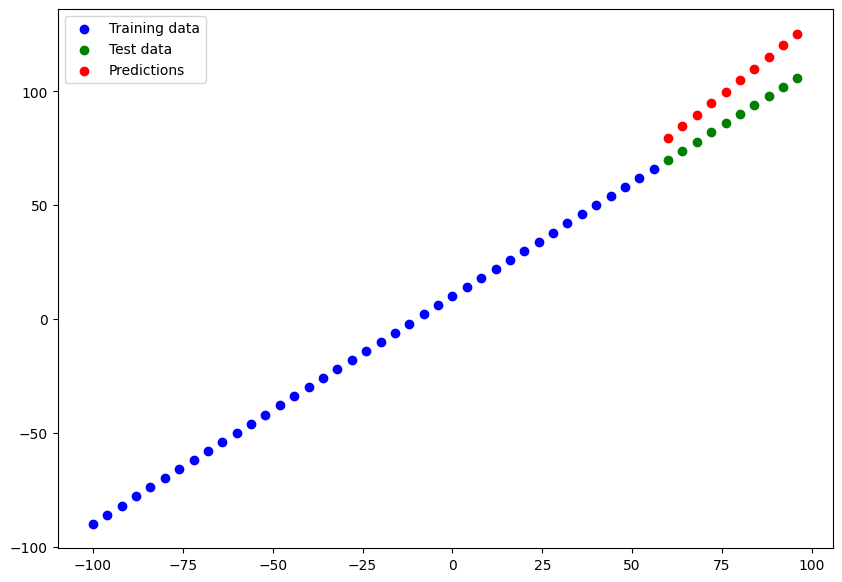

In [50]:
y_pred = model.predict(tf.expand_dims(X_test,axis=-1))
plot_predictions(predictions=y_pred)

In [51]:
#model 2

tf.random.set_seed(42)

#1.create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)])

#2. compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

#3. fit the model
model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 38.5752 - mae: 38.5752
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 36.4613 - mae: 36.4613
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 34.4290 - mae: 34.4290
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 32.3663 - mae: 32.3663
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 30.3627 - mae: 30.3627
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 28.3534 - mae: 28.3534
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 26.2972 - mae: 26.2972
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 24.2037 - mae: 24.2037
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 22.2646 - mae: 22.2646
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 20.3212 - mae: 20.3212
Epoch 11/100
2/2 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 50ms/step


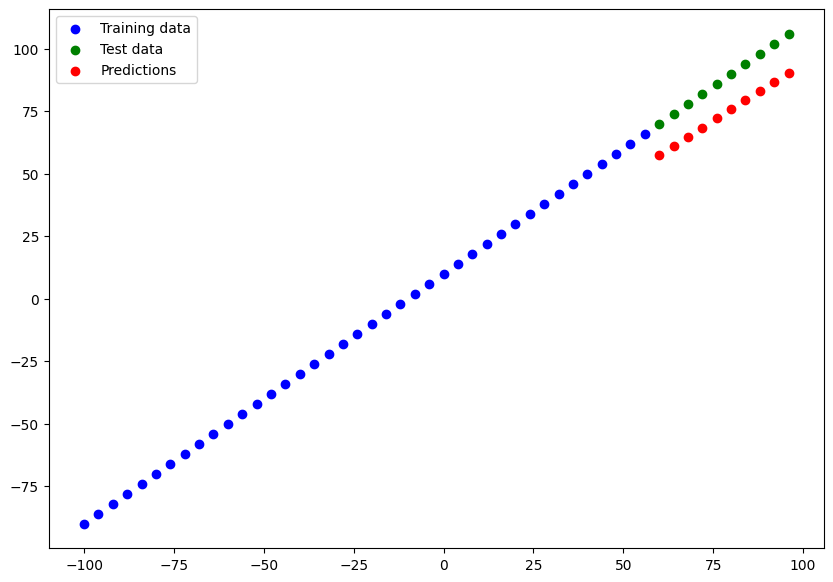

In [52]:
#make and plot prediction of model_2
y_pred_2 = model_2.predict(tf.expand_dims(X_test,axis=-1))
plot_predictions(predictions=y_pred_2)

In [53]:
y_pred_2

array([[57.483887],
       [61.150917],
       [64.817955],
       [68.484985],
       [72.15202 ],
       [75.81905 ],
       [79.48608 ],
       [83.15312 ],
       [86.820145],
       [90.48718 ]], dtype=float32)

In [54]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [55]:
#make some functions to reuse MAE and MSE
def mae(y_true,y_pred):
  m = tf.keras.metrics.MeanAbsoluteError()
  m.update_state(y_true,y_pred)
  return m.result().numpy()
def mse(y_true,y_pred):
  m = tf.metrics.MeanSquaredError()
  m.update_state(y_true,y_pred)
  return m.result().numpy()



In [56]:
#model 3

tf.random.set_seed(42)

#1.create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)])

#2. compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

#3. fit the model
model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 7ms/step - loss: 5.7598 - mae: 5.7598
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 5.7015 - mae: 5.7015
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 5.6866 - mae: 5.6866
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 5.6846 - mae: 5.6846
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 5.6488 - mae: 5.6488
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 5.6159 - mae: 5.6159
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 5.5719 - mae: 5.5719
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 5.5462 - mae: 5.5462
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 5.5153 - mae: 5.5153
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 5.5086 - mae: 5.5086
Epoch 11/500
2/2 [==============================] - 0s 4ms/step - loss: 5.5655 

1/1 [==============================] - 0s 83ms/step


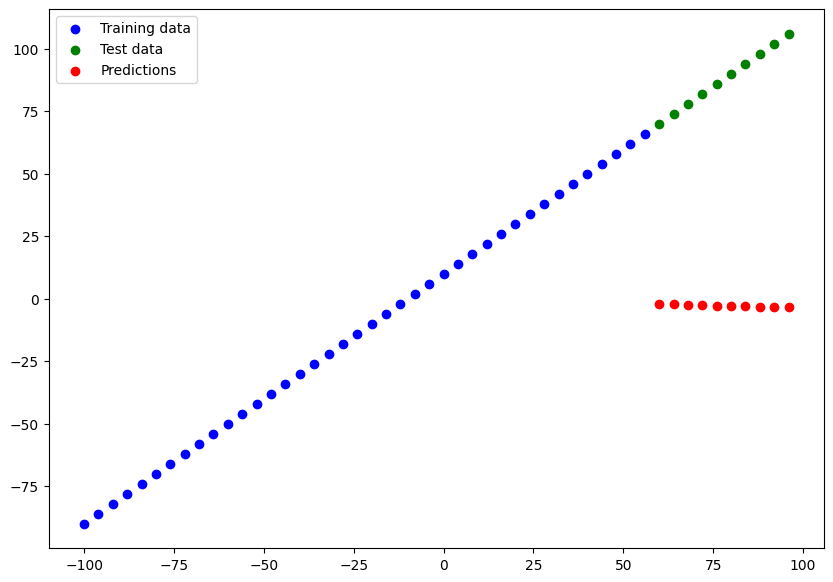

In [57]:
#make and plot some predictions
y_pred_3 = model_3.predict(tf.expand_dims(X_test,axis=-1))
plot_predictions(predictions=y_pred_3)

In [58]:
#calculate model 3 evaluation metrics
mae_3 = mae(y_test,y_pred_3)
mse_3 = mse(y_test,y_pred_3)
mae_3,mse_3

(90.77246, 8381.189)

In [59]:
  mae_2 = mae(y_test,y_pred_2)
  mse_2 = mse(y_test,y_pred_2)
  mae_2,mse_2

(14.014465, 197.3199)

# Comparing results of the experiments


In [60]:
# Compare our model's results using a pandas Dataframe

import pandas as pd
model_results = [["model",mae,mse],
                 ["model_2",mae_2,mse_2],
                 ["model_3",mae_3,mse_3]]

In [61]:
all_results = pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model,<function mae at 0x7e45e07a29e0>,<function mse at 0x7e45e07a2950>
1,model_2,14.014465,197.319901
2,model_3,90.772461,8381.189453


## Saving and loading our models

saving the models allows us to use them outside of google colab such as web application or a mobile app.

In [62]:
#savedModel format
model.save("Saved_model_format.keras")

In [63]:
model.save("model_hdf5.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [64]:
load_model = tf.keras.models.load_model("model_hdf5.h5")
load_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 20)                40        
                                                                 
 output_layer (Dense)        (None, 1)                 21        
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 20)                40        
                                                                 
 output_layer (Dense)        (None, 1)                 21        
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
#compare model predictions
model_pred = model.predict(tf.expand_dims(X_test,axis=-1))#we can do with or without expand dims both are acceptable
load_model_pred = load_model.predict(X_test)

model_pred,load_model_pred

1/1 [==============================] - 0s 48ms/step


(array([[ 79.53278 ],
        [ 84.62266 ],
        [ 89.71253 ],
        [ 94.80241 ],
        [ 99.89228 ],
        [104.98214 ],
        [110.07202 ],
        [115.161896],
        [120.25177 ],
        [125.34163 ]], dtype=float32),
 array([[ 79.53278 ],
        [ 84.62266 ],
        [ 89.71253 ],
        [ 94.80241 ],
        [ 99.89228 ],
        [104.98214 ],
        [110.07202 ],
        [115.161896],
        [120.25177 ],
        [125.34163 ]], dtype=float32))

In [67]:
load_model_pred == model_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# Download a file

In [68]:
#download file from google colab
from google.colab import files
files.download("model_hdf5.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
#TO Drive
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
!cp model_hdf5.h5 "/content/drive/My Drive/Colab Notebooks/"

In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/"

# A Larger example

In [5]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
#Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
#Let's try one-hot encode our dataframe
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [8]:
#Let's try one-hot encode our dataframe
insurance_one=pd.get_dummies(insurance).astype(int)
insurance_one.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0


In [9]:
# Create X & y (features and labels)
X = insurance_one.drop("charges",axis=1)
y = insurance_one["charges"]

In [10]:
#view X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,1,0,0,1,0,0,0,1
1,18,33,1,0,1,1,0,0,0,1,0
2,28,33,3,0,1,1,0,0,0,1,0
3,33,22,0,0,1,1,0,0,1,0,0
4,32,28,0,0,1,1,0,0,1,0,0


In [11]:
tf.constant(X)

<tf.Tensor: shape=(1338, 11), dtype=int64, numpy=
array([[19, 27,  0, ...,  0,  0,  1],
       [18, 33,  1, ...,  0,  1,  0],
       [28, 33,  3, ...,  0,  1,  0],
       ...,
       [18, 36,  0, ...,  0,  1,  0],
       [21, 25,  0, ...,  0,  0,  1],
       [61, 29,  0, ...,  1,  0,  0]])>

In [12]:
#view y
y.head()

,charges
0,16884
1,1725
2,4449
3,21984
4,3866


In [13]:
tf.constant(y)

<tf.Tensor: shape=(1338,), dtype=int64, numpy=array([16884,  1725,  4449, ...,  1629,  2007, 29141])>

In [14]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [15]:
# Build a neural network (sort of like model above)
tf.random.set_seed(42)

#1.create a model
insurance_model= tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2.Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

#3.fit the model
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8695.1660 - mae: 8695.1660
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7860.2188 - mae: 7860.2188
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7595.9946 - mae: 7595.9946
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7753.0947 - mae: 7753.0947
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7755.4556 - mae: 7755.4556
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7632.1992 - mae: 7632.1992
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7604.1118 - mae: 7604.1118
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7819.8535 - mae: 7819.8535
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7600.3857 - mae: 7600.3857
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7738.3574 - mae: 7738.3574

In [16]:
#Check the results of the insurance model
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7396.8579 - mae: 7396.8579


[7396.85791015625, 7396.85791015625]

In [17]:
y_train

,charges
560,9193
1285,8534
1142,27117
969,8596
486,12475
...,...
1095,4561
1130,8582
1294,11931
860,46113


In [18]:
y_train.median(),y_train.mean()

(9574.5, 13345.596261682243)

# Improving the model.

1. add an extra layer with more hidden units and use the adam optimizer
2. train for longer
3. insert an experiment(own)

In [19]:
# Build a neural network (sort of like model above)
tf.random.set_seed(42)

#1.create a model
insurance_model_2= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2.Compile the model
insurance_model_2.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

#3.fit the model
insurance_model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13260.0996 - mae: 13260.0996
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13045.6934 - mae: 13045.6934
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12614.5264 - mae: 12614.5264
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 11810.1377 - mae: 11810.1377
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 10555.6123 - mae: 10555.6123
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9090.5791 - mae: 9090.5791
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7902.9263 - mae: 7902.9263
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7475.4453 - mae: 7475.4453
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7415.9512 - mae: 7415.9512
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7396.0806 - mae:

In [20]:
#Evaluate the larger model
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4691.6753 - mae: 4691.6753


[4691.67529296875, 4691.67529296875]

In [21]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7396.8579 - mae: 7396.8579


[7396.85791015625, 7396.85791015625]

In [22]:
# Build a neural network (sort of like model above)
tf.random.set_seed(42)

#1.create a model
insurance_model_3= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2.Compile the model
insurance_model_3.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

#3.fit the model
history=insurance_model_3.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 1ms/step - loss: 13267.6748 - mae: 13267.6748
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13061.2031 - mae: 13061.2031
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12647.2031 - mae: 12647.2031
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 11863.4375 - mae: 11863.4375
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 10624.0557 - mae: 10624.0557
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 9163.7207 - mae: 9163.7207
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 7961.2339 - mae: 7961.2339
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7503.0713 - mae: 7503.0713
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7440.6177 - mae: 7440.6177
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7421.0039 - mae:

In [23]:
#evaluating our third model
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3484.4067 - mae: 3484.4067


[3484.40673828125, 3484.40673828125]

In [24]:
y_train

,charges
560,9193
1285,8534
1142,27117
969,8596
486,12475
...,...
1095,4561
1130,8582
1294,11931
860,46113


Text(0.5, 0, 'epochs')

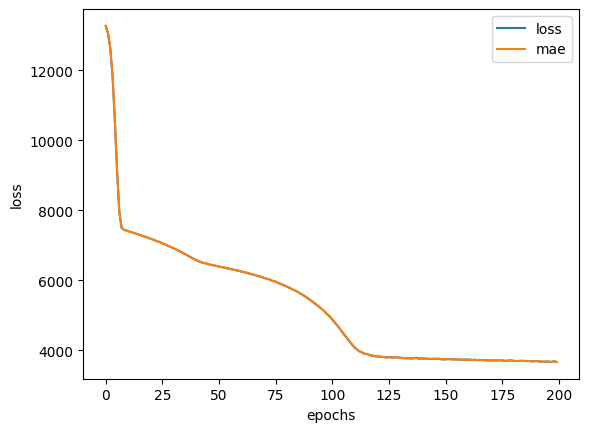

In [25]:
#plot history (loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


# Preprocessing data(normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [27]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# To prepare our data, we can borrow few classes from scikit-learn

In [35]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

from sklearn.model_selection import train_test_split
#create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),#turn all the values in these columns between 0 to 1(as they are varaible amounts) and the other columns would be one hot encoded 0 or 1.
    (OneHotEncoder(handle_unknown='ignore'),["sex","smoker","region"])
       )
# Create X and y

X = insurance.drop("charges",axis=1)
y = insurance["charges"]

#Build our train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Fit the column transformer to the training data(the data which is available as test set considered to future variable so we don't fit it instead we after fitting we use it to transform test data.)
ct.fit(X_train)

#Transfowm training and test data with normalization (onehotencoder and MinMaxScaler)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [37]:
#what does our data look like now?
X_train.loc[0]
#X_train_normal.loc[0] doesn't work

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [38]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [39]:
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

In [41]:
# Convert the NumPy array back into a Pandas DataFrame.
X_train_normalpd = pd.DataFrame(X_train_normal, columns=ct.get_feature_names_out())

# Now you can use the .head() method:
X_train_normalpd.head()

,minmaxscaler__age,minmaxscaler__bmi,minmaxscaler__children,onehotencoder__sex_female,onehotencoder__sex_male,onehotencoder__smoker_no,onehotencoder__smoker_yes,onehotencoder__region_northeast,onehotencoder__region_northwest,onehotencoder__region_southeast,onehotencoder__region_southwest
0,0.608696,0.107345,0.4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.630435,0.224913,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.739130,0.239440,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.456522,0.493947,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.782609,0.148238,0.6,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


<Axes: ylabel='Frequency'>

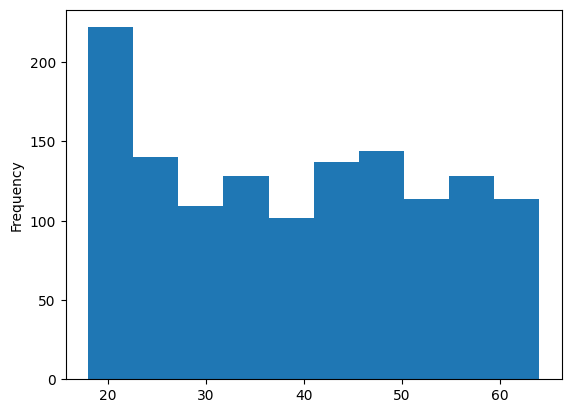

In [29]:
X["age"].plot(kind="hist")

In [42]:
#Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#2. compile the model
insurance_model_4.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics =["mae"])

#3. fit the model

insurance_model_4.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13342.8496 - mae: 13342.8496
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13332.8906 - mae: 13332.8906
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13308.7617 - mae: 13308.7617
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13259.7324 - mae: 13259.7334
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13175.0078 - mae: 13175.0078
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 13043.7627 - mae: 13043.7627
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 12855.6250 - mae: 12855.6250
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 12600.6250 - mae: 12600.6250
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 12268.6973 - mae: 12268.6973
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 11857.62

In [43]:
#evaluate model trained on normalized data this should be better than non-normalized data

insurance_model_4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3435.9558 - mae: 3435.9558


[3435.955810546875, 3435.955810546875]